In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
print("Successfully Imported Necessary Libraries!")

Successfully Imported Necessary Libraries!


In [2]:
df = pd.read_csv("datasets/cleanedAdvanced/overall-teams-data.csv", index_col = "Unnamed: 0")

In [3]:
df.head(1)

,Player,Age,Tkl,TacklesDef3rd,TacklesMid3rd,TacklesAtt3rd,VSDribblesTkl,VSDribblesAtt,VSDribblesTkl%,VSDribblesPast,...,SCADef,GCA,GCA90,GCAPassLive,GCAPassDead,GCADrib,GCASh,GCAFld,GCADef,Points Total
20,Wolves S2,26.6,646,358,227,61,281,685,41.0,404,...,18,83,2.18,53,6,9,8,7,0,59


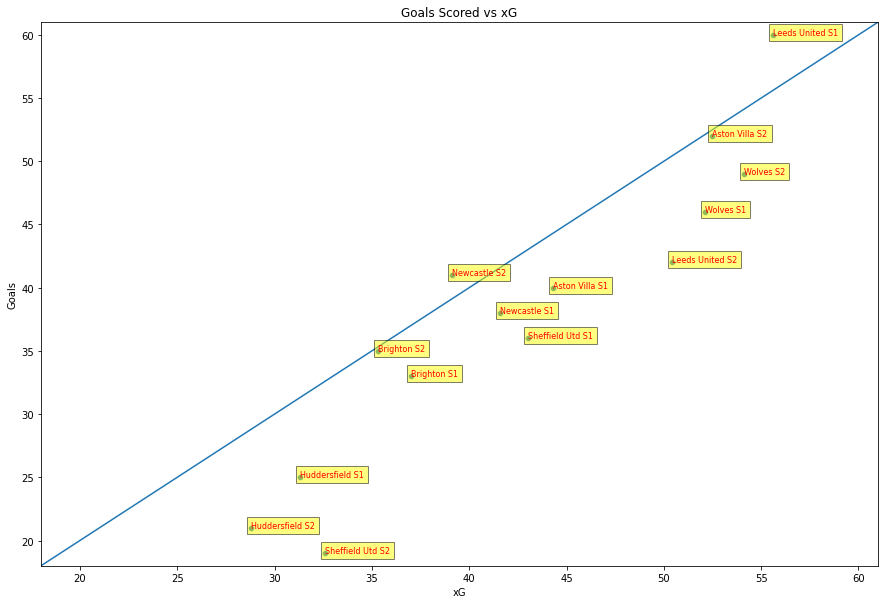

In [4]:
# xg vs actual goals
if df.xG.min() - 1 > df.Gls.min() - 1:
    min_y = df.Gls.min() - 1
else:
    min_y = df.xG.min() - 1
    
if df.xG.max() + 1 < df.Gls.max() + 1:
    max_x = df.Gls.max() + 1
else:
    max_x = df.xG.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xG",
            y = "Gls", 
            ci = None,
            data = df)

x1 = list(df.xG)
y1 = list(df.Gls)
lbl = list(df.Player)
for i in range(df.shape[0]):
    plt.text(x = x1[i], y = y1[i], s = lbl[i], 
          fontdict = dict(color = "red", size = 8),
          bbox = dict(facecolor = "yellow", alpha = 0.5))

plt.axline((0, 0), slope = 1)
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Goals Scored vs xG") #title
plt.xlabel("xG") #x label
plt.ylabel("Goals") #y label

plt.show()

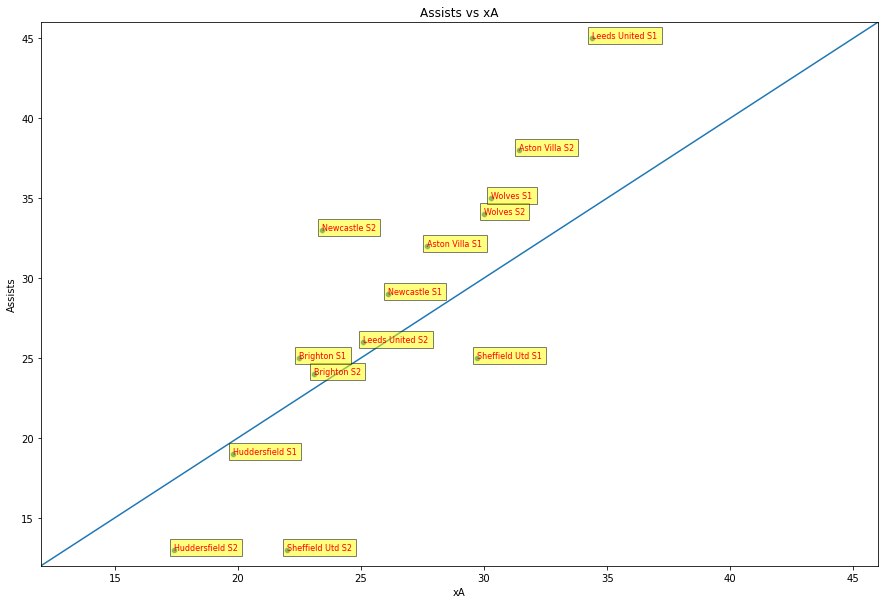

In [5]:
# xa vs assists
### get max for axis
if df.xA.min() - 1 > df.Assists.min() - 1:
    min_y = df.Assists.min() - 1
else:
    min_y = df.xA.min() - 1
    
if df.xA.max() + 1 < df.Assists.max() + 1:
    max_x = df.Assists.max() + 1
else:
    max_x = df.xA.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xA",
            y = "Assists", 
            ci = None,
            data = df)

x1 = list(df.xA)
y1 = list(df.Assists)
lbl = list(df.Player)
for i in range(df.shape[0]):
    plt.text(x = x1[i], y = y1[i], s = lbl[i], 
          fontdict = dict(color = "red", size = 8),
          bbox = dict(facecolor = "yellow", alpha = 0.5))
plt.axline((0, 0), slope = 1)
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)    #set y limit 
plt.title("Assists vs xA") #title
plt.xlabel("xA") #x label
plt.ylabel("Assists") #y label

plt.show()

In [6]:
pens = list(df['PK'])
glls = list(df['Gls'])
non_pen = []
for i in range(len(glls)):
    val = glls[i] - pens[i]
    non_pen.append(val)
    
non_pen

[45, 40, 30, 20, 16, 47, 37, 42, 38, 28, 23, 35, 39, 56]

In [7]:
df['NonPenaltyGoals'] = non_pen

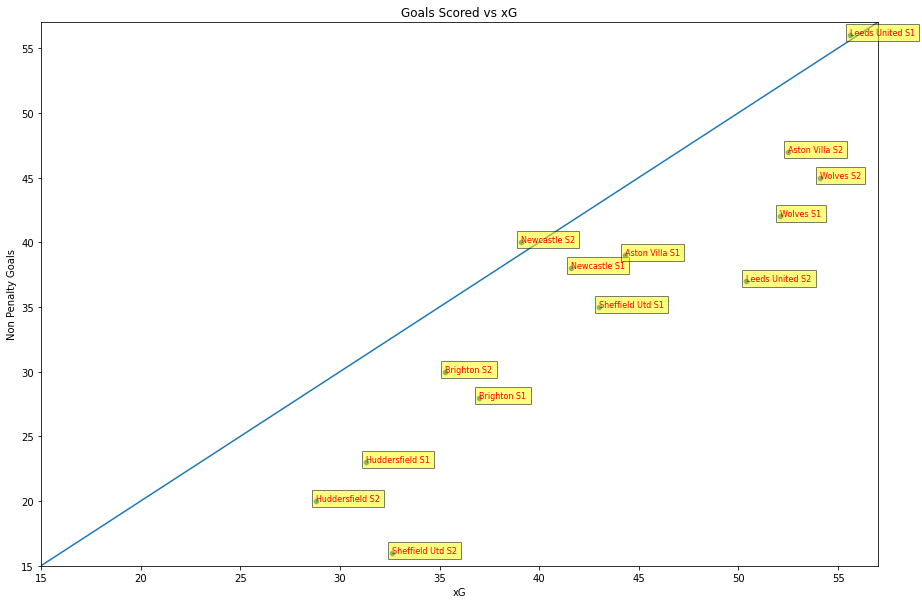

In [10]:
# xg vs non pen actual goals
if df.xG.min() - 1 > df.NonPenaltyGoals.min() - 1:
    min_y = df.NonPenaltyGoals.min() - 1
else:
    min_y = df.xG.min() - 1
    
if df.xG.max() + 1 < df.NonPenaltyGoals.max() + 1:
    max_x = df.NonPenaltyGoals.max() + 1
else:
    max_x = df.xG.max() + 1

plt.figure(figsize=(15, 10))
sns.scatterplot(x = "xG",
            y = "NonPenaltyGoals", 
            ci = None,
            data = df)

x1 = list(df.xG)
y1 = list(df.NonPenaltyGoals)
lbl = list(df.Player)
for i in range(df.shape[0]):
    plt.text(x = x1[i], y = y1[i], s = lbl[i], 
          fontdict = dict(color = "red", size = 8),
          bbox = dict(facecolor = "yellow", alpha = 0.5))

plt.axline((0, 0), slope = 1)
plt.xlim(min_y, max_x)
plt.ylim(min_y, max_x)
plt.title("Goals Scored vs xG") #title
plt.xlabel("xG") #x label
plt.ylabel("Non Penalty Goals") #y label

plt.show()